# Import Libraries

Include all necessary modules for analysis.

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import *

# Read-In Data

We read the data in using the Pandas module for easy conversion from a CSV file format to an in-memory DataFrame.

Dataset from: http://insideairbnb.com/vancouver

In [157]:
airbnb = pd.read_csv("data/listings.csv")
airbnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13358,https://www.airbnb.com/rooms/13358,20230314070648,2023-03-14,city scrape,Designer Styled One Bedroom Downtown Vancouver,<b>The space</b><br />This suites central loca...,NaN,https://a0.muscache.com/pictures/40034c18-0837...,52116,...,4.80,4.92,4.68,22-311727,f,1,1,0,0,2.86
1,13490,https://www.airbnb.com/rooms/13490,20230314070648,2023-03-14,city scrape,Vancouver's best kept secret,This apartment rents for one month blocks of t...,"In the heart of Vancouver, this apartment has ...",https://a0.muscache.com/pictures/73394727/79d5...,52467,...,4.97,4.78,4.88,NaN,f,1,1,0,0,0.67
2,14267,https://www.airbnb.com/rooms/14267,20230314070648,2023-03-14,previous scrape,EcoLoft Vancouver,"The Ecoloft is located in the lovely, family r...",We live in the centre of the city of Vancouver...,https://a0.muscache.com/pictures/3646de9b-934e...,56030,...,4.68,4.77,4.71,21-156500,t,1,1,0,0,0.22
3,14424,https://www.airbnb.com/rooms/14424,20230314070648,2023-03-14,city scrape,Spacious one-bedroom in sought-after Strathcona,<b>The space</b><br />Welcome to Strathcona --...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,56709,...,4.72,4.60,4.74,19-162091,f,4,4,0,0,1.66
4,16254,https://www.airbnb.com/rooms/16254,20230314070648,2023-03-14,city scrape,Close to PNE/Hastings Park Garden level suite,2 Bedroom garden level guest suite.(lower leve...,"Good Eats, Cute Shops and all the personality ...",https://a0.muscache.com/pictures/d0cdc9b4-5937...,63238,...,5.00,4.86,4.29,19-162421,f,1,1,0,0,0.12


In [134]:
airbnb.tail()

,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
845284101352923786,https://www.airbnb.com/rooms/845284101352923786,20230314070648,2023-03-14,city scrape,Private 2BR Suite close to Queen Elizabeth Park,"Kick back and relax in this calm, stylish spac...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,504936838,https://www.airbnb.com/users/show/504936838,...,NaN,NaN,NaN,23-189107,t,1,1,0,0,NaN
845854561820158781,https://www.airbnb.com/rooms/845854561820158781,20230314070648,2023-03-14,city scrape,One bedroom apartment,Enjoy a stylish experience at this centrally l...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,49461922,https://www.airbnb.com/users/show/49461922,...,NaN,NaN,NaN,NaN,t,3,3,0,0,NaN
845891831251005257,https://www.airbnb.com/rooms/845891831251005257,20230314070648,2023-03-14,city scrape,4 Bedroom house in Vancouver,Your family will be close to everything when y...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,97054642,https://www.airbnb.com/users/show/97054642,...,NaN,NaN,NaN,23-195309,t,2,2,0,0,NaN
845936827653470100,https://www.airbnb.com/rooms/845936827653470100,20230314070648,2023-03-14,city scrape,Stylish Zen Townhouse,"1BR in beautiful 2BR, 2bath townhouse in Kits....","Located on a quiet, tree-lined street in Kitsi...",https://a0.muscache.com/pictures/miso/Hosting-...,3664868,https://www.airbnb.com/users/show/3664868,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
845960950280088622,https://www.airbnb.com/rooms/845960950280088622,20230314070648,2023-03-14,city scrape,Fresh new modern A/C condo @ Queen Elizabeth Park,Impression when step in condo<br />lovely fres...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,430820918,https://www.airbnb.com/users/show/430820918,...,NaN,NaN,NaN,Exempt,t,4,4,0,0,NaN


In [221]:
# Check for missing values
airbnb.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                       25
neighborhood_overview                           1979
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                   1210
host_about                                      2665
host_response_time                              1107
host_response_rate                              1107
host_acceptance_rate                             865
host_is_superhost                             

# Analysis

Analyze the data to gain a better understanding of it and locate any emerging trends.

In [31]:
# Summary statistics of quantitative features of the dataset
airbnb.drop(["id", "host_id", "neighbourhood_group"], axis=1).describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,4940.000000,5975.000000,5975.000000,5975.000000
mean,49.263760,-123.112078,217.421757,17.361339,37.731381,1.623176,7.311632,139.216904,12.653389
std,0.020279,0.037324,1087.709532,32.705775,67.994988,1.727232,17.694416,120.738639,19.908634
min,49.202960,-123.217730,14.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,49.251780,-123.130821,101.000000,2.000000,2.000000,0.310000,1.000000,31.000000,0.000000
50%,49.270278,-123.116180,149.000000,3.000000,10.000000,0.990000,1.000000,105.000000,3.000000
75%,49.279238,-123.091415,219.000000,30.000000,44.000000,2.500000,3.000000,236.500000,17.500000
max,49.294360,-123.023680,77178.000000,399.000000,863.000000,18.090000,102.000000,365.000000,166.000000


Distribution of room types.

room_type
Entire home/apt    4921
Hotel room            3
Private room       1025
Shared room          26
Name: id, dtype: int64

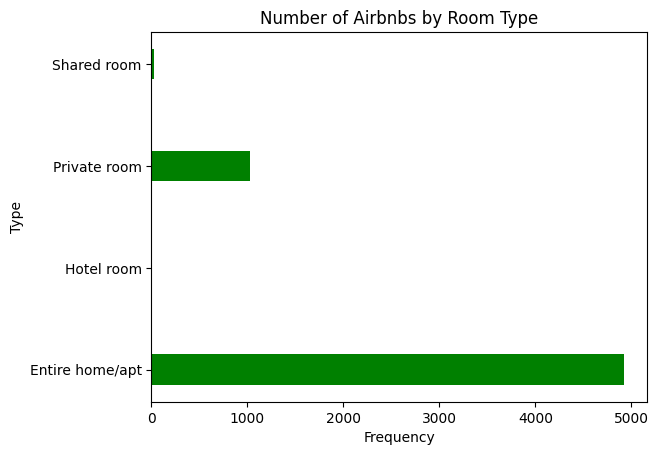

In [230]:
room_types = airbnb.groupby("room_type")["id"].aggregate("count")
plt.barh(room_types.index, room_types, color="green", height=0.3)
plt.title("Number of Airbnbs by Room Type")
plt.xlabel('Frequency')
plt.ylabel('Type')
room_types

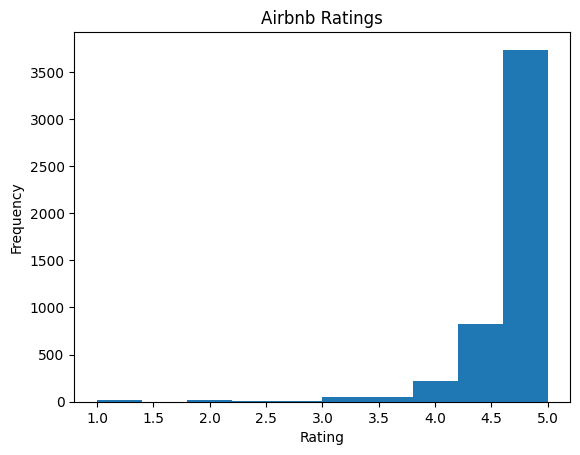

In [224]:
plt.hist(airbnb["review_scores_value"])
plt.title('Airbnb Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Visualization

Plot findings on a read-world map using latitude and longitude coordinates with the Folium module.

In [200]:
map_data = airbnb.head(50)
map_figure = folium.Map([map_data.latitude.mean(), map_data.longitude.mean()], zoom_start=12)

def html_popup(row):
    name=map_data['name'].iloc[row]
    rate=map_data['review_scores_value'].iloc[row]
    url=map_data['listing_url'].iloc[row]
    lat=map_data['latitude'].iloc[row]
    lon=map_data['longitude'].iloc[row]
    scraped=map_data['last_scraped'].iloc[row]
    
    html=f"""
    <h4>{name}</h4>
    <h5>Rating: {str(rate)}</h5>
    <a href={url}>{url}</a>
    <h5></h5>
    <table>
        <tr><th>Latitude</th><th>Longitude</th></tr>
        <tr><td>{str(lon)}</td><td>{str(lon)}</td></tr>
    </table>
    <br>
    <p>Last updated {scraped}
    """
    return html

for index, listing in map_data.iterrows():
    folium.Marker([listing['latitude'], listing['longitude']],
                        popup=html_popup(index),
                        radius=3,
                        icon = folium.Icon(icon="house", prefix="fa", color="red"),
                        tooltip = listing["name"],
                       ).add_to(map_figure)

map_figure

In [50]:
#map_airbnb.save('map-airbnb.html')